<a href="https://colab.research.google.com/github/Festuskipkoech/Festus_data-science/blob/main/UnsupervisedMlClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Unsupervised Learning

## Definition
Unsupervised learning is a type of machine learning that deals with datasets without labeled responses. The main objective is to identify underlying patterns or groupings within the data.

## Key Characteristics
- **No predefined labels or categories.**
- **Algorithms learn from the structure and distribution of the data itself.**
- Commonly used techniques include clustering, dimensionality reduction, and association rule mining.


## Definition
Clustering is an unsupervised learning technique that groups data points based on their similarities, aiming to maximize intra-cluster similarity and minimize inter-cluster similarity.

## Key Algorithms
- **K-Means**: Partitions data into \( k \) clusters based on the mean distance to centroids.
- **Hierarchical Clustering**: Builds a tree-like structure of clusters through either agglomerative or divisive methods.
- **DBSCAN**: Groups points based on density, identifying noise as


## Applications
- **Customer Segmentation**: Identifying distinct groups of customers for targeted marketing.
- **Image Recognition**: Grouping similar images for easier retrieval and classification.
- **Anomaly Detection**: Identifying unusual data points, such as fraud detection in finance.



# Market Basket Analysis

## Definition
Market Basket Analysis (MBA) is a data mining technique used to identify relationships between items purchased together. It employs association rule mining to uncover patterns in transaction data.


## Key Concepts
- **Association Rules**: Statements of the form \( A \rightarrow B \) (if A, then B), where A and B are items.
- **Support**: The proportion of transactions that contain both A and B.
- **Confidence**: The likelihood that B is purchased when A is purchased.
- **Lift**: The ratio of observed support to expected support if A and B were independent.

## Common Algorithms
- **Apriori Algorithm**: Identifies frequent itemsets and derives association rules. It uses a bottom-up approach, generating candidate itemsets and filtering them based on minimum support.
- **FP-Growth Algorithm**: A more efficient approach that uses a tree structure to represent transactions, avoiding the generation of candidate itemsets.

## Applications
- **Recommendation Systems**: Suggesting products based on items frequently bought together, enhancing customer experience.
- **Inventory Management**: Optimizing stock levels based on observed purchasing patterns.
- **Marketing Strategies**: Developing targeted promotions based on common purchase behaviors.

# Conclusion
Unsupervised learning, particularly through clustering and market basket analysis, plays a vital role in uncovering hidden patterns within data. These techniques help businesses make informed decisions, improve customer satisfaction, and optimize operations, showcasing the power of data-driven insights.

In [1]:
# Import the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the Dataset
customers_data = pd.read_csv('https://msi.martial.co.ke/data/Mall_Customers.csv')
customers_data.head(10)

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15.0,39.0
1,2,Male,21,15.0,81.0
2,3,Female,20,16.0,6.0
3,4,Female,23,16.0,77.0
4,5,Female,31,17.0,40.0
5,6,Female,22,17.0,76.0
6,7,Female,35,18.0,6.0
7,8,Female,23,18.0,94.0
8,9,Male,64,19.0,3.0
9,10,Female,30,19.0,72.0


In [5]:
# Data analysis
customers_data.isnull().sum()
# Drop teh empties
customers_data.dropna(inplace=True)

customers_data.isnull().sum()



,0
CustomerID,0
Gender,0
Age,0
Annual Income,0
Spending Score,0


In [7]:
# statistical anslysis
customers_data.describe()

,CustomerID,Age,Annual Income,Spending Score
count,192.000000,192.000000,192.000000,192.000000
mean,98.177083,38.890625,59.395833,50.416667
std,57.300255,14.059467,25.699218,25.810898
min,1.000000,18.000000,15.000000,1.000000
25%,48.750000,28.750000,40.000000,35.000000
50%,97.500000,36.000000,60.000000,50.000000
75%,146.250000,49.000000,77.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# CLUSTERING
# The Mall Wanted to Cluster its Customers Based on the Age, Income and Spending
# The Aim was to make informed Decision Based on their Customers Preferences
# Theere they wanted an OPTIMAL segement of Customers they can Use.

In [8]:
# a) Lets's get the subset(portion) of Age, Income and Spending from the Entire Dataset
customers_subset = customers_data[['Age', 'Annual Income', 'Spending Score']]
customers_subset.head()

,Age,Annual Income,Spending Score
0,19,15.0,39.0
1,21,15.0,81.0
2,20,16.0,6.0
3,23,16.0,77.0
4,31,17.0,40.0


In [9]:
# b) Lets get the values of the subset as array and store in variable X
array = customers_subset.values
X = array[:, :]
X.shape


(192, 3)


<img src="https://media.geeksforgeeks.org/wp-content/uploads/20190812011831/Screenshot-2019-08-12-at-1.09.42-AM.png">

In [10]:
# Import the KMeans Algorithm and Instantiate the Model
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5, random_state=42)
model.fit(X)

KMeans(n_clusters=5, random_state=42)

In [11]:
# Centronoids(Cluster Centers)
# This is the mean that Represents every group in the Cluster.
centronoids = model.cluster_centers_
centronoids

array([[44.05405405, 55.17567568, 49.2972973 ],
       [32.78378378, 86.37837838, 82.2972973 ],
       [24.96      , 28.04      , 77.        ],
       [40.3030303 , 85.42424242, 17.60606061],
       [45.2173913 , 26.30434783, 20.91304348]])

In [12]:
# Centronoids(Cluster Centers)
# This is the mean that Represents every group in the Cluster.
centronoids = model.cluster_centers_
centronoids_df = pd.DataFrame(centronoids, columns=['Age', 'Annual Income', 'Spending Score'])
centronoids_df

,Age,Annual Income,Spending Score
0,44.054054,55.175676,49.297297
1,32.783784,86.378378,82.297297
2,24.960000,28.040000,77.000000
3,40.303030,85.424242,17.606061
4,45.217391,26.304348,20.913043


In [13]:
# Generating members of a cluster
customers_data['Cluster'] = model.labels_
customers_data.head()

,CustomerID,Gender,Age,Annual Income,Spending Score,Cluster
0,1,Male,19,15.0,39.0,4
1,2,Male,21,15.0,81.0,2
2,3,Female,20,16.0,6.0,4
3,4,Female,23,16.0,77.0,2
4,5,Female,31,17.0,40.0,4


In [14]:
# Generating Members of a Cluster
cluster_two_members = customers_data[customers_data['Cluster'] == 2]
cluster_two_members.head(10)

,CustomerID,Gender,Age,Annual Income,Spending Score,Cluster
1,2,Male,21,15.0,81.0,2
3,4,Female,23,16.0,77.0,2
5,6,Female,22,17.0,76.0,2
7,8,Female,23,18.0,94.0,2
9,10,Female,30,19.0,72.0,2
11,12,Female,35,19.0,99.0,2
13,14,Female,24,20.0,77.0,2
15,16,Male,22,20.0,79.0,2
17,18,Male,20,21.0,66.0,2
19,20,Female,35,23.0,98.0,2


In [16]:
# Generating Members of a Cluster
cluster_four_members = customers_data[customers_data['Cluster'] == 4]
cluster_four_members.head(10)
cluster_four_members.to_csv('cluster_four_members.csv')

In [17]:
from sklearn.cluster import KMeans
inertias = []
for k in range(2, 15):
  model = KMeans(n_clusters=k, random_state=42)
  model.fit(X)
  inertias.append(model.inertia_)

print(inertias)

[217575.5375939849, 145798.14936936944, 99105.01037415837, 70664.09994872342, 66472.2942013918, 50667.74507835871, 47008.183698883025, 43779.87393609336, 37024.45080328313, 35279.384661092, 31989.55305425124, 29379.957707327634, 27492.773375530396]


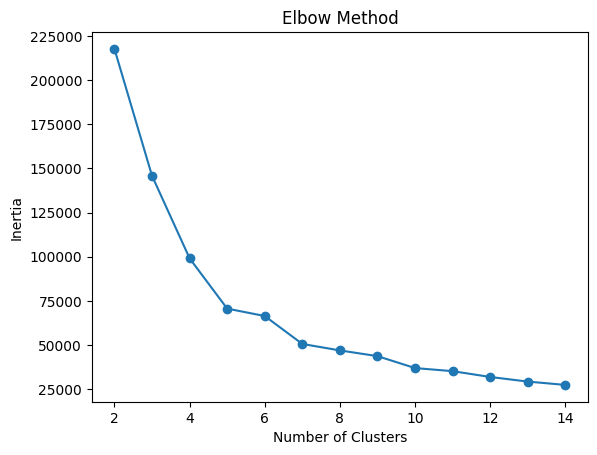

In [18]:
plt.plot(range(2, 15), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()